## Stochastic Gradient Descent


### Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


### Dataset

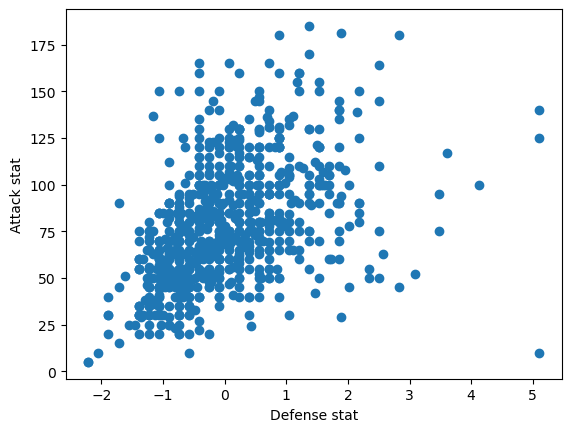

In [22]:
df = (pd.read_csv("./data/pokemon.csv", usecols=['name', 'defense', 'attack'], index_col=0)
        .reset_index()
     )
x = StandardScaler().fit_transform(df[['defense']]).flatten()
y = df['attack'].to_numpy()

plt.xlabel("Defense stat")
plt.ylabel("Attack stat")
plt.scatter(x, y)
plt.show()

### SGD with contour plot

In [10]:
def gradient(w, X, y):
    """Gradient of mean squared error."""
    return 2 * (X.T @ (X @ w) - X.T @ y) / len(X)

Iteration 100. Intercept 69.19, Slope 21.12.
Iteration 200. Intercept 76.37, Slope 18.07.
Iteration 300. Intercept 78.32, Slope 17.21.
Terminated! Final Intercept: 78.32, Slope: 17.21.
Iteration 100. Intercept 69.19, Slope 21.12.
Iteration 200. Intercept 76.37, Slope 18.07.
Iteration 300. Intercept 78.32, Slope 17.21.
Terminated! Final Intercept: 78.32, Slope: 17.21.


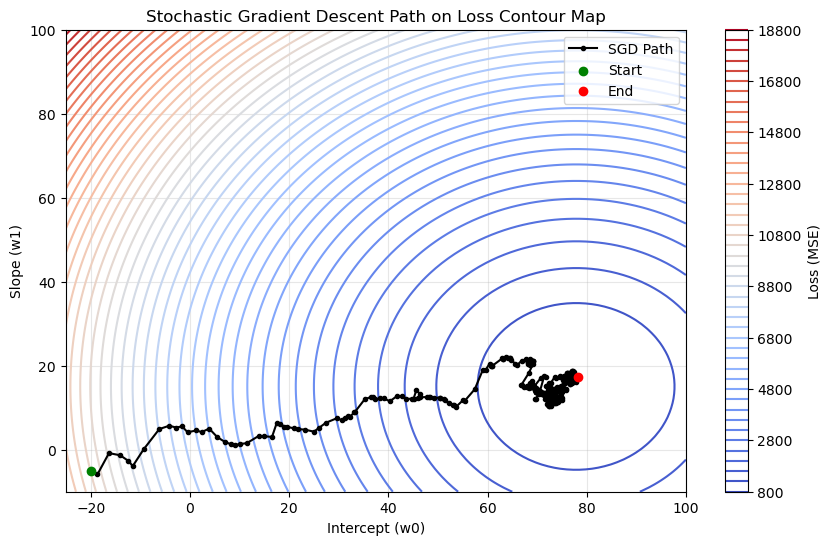

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define gradient function for simple linear regression
def gradient(w, x, y):
    """Gradient of mean squared error."""
    return 2 * (x.T @ (x @ w) - x.T @ y) / len(x)

# Stochastic Gradient Descent implementation
def stochastic_gradient_descent(x, y, w, alpha, num_iterations=300, print_progress=100, seed=None):
    """Stochastic gradient descent for simple linear regression."""
    if seed is not None:  
        np.random.seed(seed)

    path = [w.copy()]  # Store the path for visualization
    iterations = 1
    while iterations <= num_iterations:
        i = np.random.randint(len(x))  # Randomly select a data point
        g = gradient(w, x[i, None], y[i, None])  # Calculate the gradient
        w -= alpha * g  # Update weights
        path.append(w.copy())  # Append updated weights to path
        if iterations % print_progress == 0:
            print(f"Iteration {iterations}. Intercept {w[0]:.2f}, Slope {w[1]:.2f}.")
        iterations += 1

    print(f"Terminated! Final Intercept: {w[0]:.2f}, Slope: {w[1]:.2f}.")
    return np.array(path)

w = [-20, -5]
alpha = 0.01
X = np.hstack((np.ones((len(x), 1)), x[:, None]))
stochastic_gradient_descent(X, y, w, alpha, seed=2020)

# Perform SGD and store the path
path = stochastic_gradient_descent(X, y, w, alpha, seed=2020)

# Create a contour plot of the loss function
w0_range = np.linspace(-25, 100, 100)  # Range for intercept (w0)
w1_range = np.linspace(-10, 100, 100)  # Range for slope (w1)
W0, W1 = np.meshgrid(w0_range, w1_range)

# Compute the loss (MSE) for each combination of w0 and w1
loss = np.zeros_like(W0)
for i in range(len(w0_range)):
    for j in range(len(w1_range)):
        w_temp = np.array([W0[i, j], W1[i, j]])
        loss[i, j] = np.mean((y - (X @ w_temp)) ** 2)

# Plot the contour map and SGD path
plt.figure(figsize=(10, 6))
contour = plt.contour(W0, W1, loss, levels=50, cmap="coolwarm")
plt.colorbar(contour, label="Loss (MSE)")
plt.plot(path[:, 0], path[:, 1], marker="o", markersize=3, color="black", label="SGD Path")
plt.scatter(path[0, 0], path[0, 1], color="green", label="Start", zorder=5)  # Starting point
plt.scatter(path[-1, 0], path[-1, 1], color="red", label="End", zorder=5)  # Ending point
plt.title("Stochastic Gradient Descent Path on Loss Contour Map")
plt.xlabel("Intercept (w0)")
plt.ylabel("Slope (w1)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [26]:
m = LinearRegression().fit(np.atleast_2d(x).T, y)
print(f"sklearn Intercept = {m.intercept_:.2f}")
print(f"sklearn Slope = {m.coef_[0]:.2f}")

sklearn Intercept = 77.86
sklearn Slope = 15.07
